<a id='content'></a>
# Content

## Models
### a) [Model 1](#M1)
### b)  [Model 2](#M2)
### c)  [Model 3](#M3)
### d) [Model 4](#M4)
### e)  [Model 5](#M5)
### f) [Plotting of BIC Values](#pm)
### g) [Plotting of Mean BIC Values](#pibic)
### h)[ Likelihood Of Models by Bayesion Model Selection](#likel)

## Hierarchical Regressions
### a) [Model to Predict Value-Based Confidence Task](#valconf)
### b) [Model to Predict Perceptual Confidence by Value-Based Confidence in Previous Trial](#perconf)
### c) [Model to Predict Perceptual Confidence by Perceptual Confidence in Previous Trial](#ppconf)
### d) [Model to Predict Value-Based Confidence by Value-Based Confidence in Previous Trial](#vvconf)
### e) [Model to Predict Choice of Correct Deck](#rightd)

## Hierarchical Drift Diffusion Model Estimates
### a) [HDDM - Beta as a Free Parameter](#a)
### b) [HDDM - Beta as a Fixed Parameter](#hddm_f)


# Models

<a id='M1'></a>

# Rescorla- Wagner (Model 1): 
## Vchosen(i+1) = Vchosen(i) + (r-Vchosen(i)) * α 
#### Mean BIC Level: 284.7

# [Back to Content](#content)

<a id='M2'></a>

# Model 2
## Vchosen(i+1) = Vchosen(i) + (r-Vchosen(i)) * α 
## Vunchosen(i+1) = Vunchoseni) * λ
#### Mean BIC Level: 270.3

# [Back to Content](#content)

<a id='M3'></a>

# Model 3: 
## Vchosen(i+1) = Vchosen(i) + (r-Vchosen(i)) x (α/1+ exp((γ x Perceptual Confidence))
## Vunchosen(i+1) = Vunchosen(i) * λ

#### Mean BIC Level:   275.18

# [Back to Content](#content)

<a id='M4'></a>

# Model 4: 
## Vchosen(i+1) = Vchosen(i) + (r-Vchosen(i)) x (α/(1+ (exp(ω x Value-Based Confidence)) 
## Vunchosen(i+1) = Vunchosen(i) * λ

#### Mean BIC Level:   273.87

# [Back to Content](#content)

<a id='M5'></a>

# Model 5: 
## Vchosen(i+1) = Vchosen(i) + (r-Vchosen(i)) x (α/(1+ exp(γ x Perceptual Confidence) + exp(ω x Value-Based Confidence))
## Vunchosen(i+1) = Vunchosen(i) * λ

#### Mean BIC Level:     278.9

# [Back to Content](#content)

<a id='pm'></a>
# Plotting of Mean BIC Values

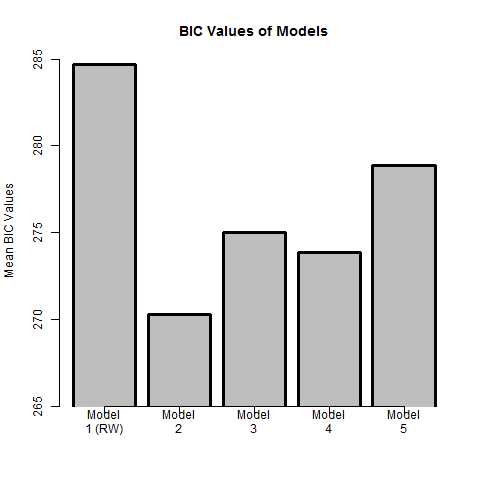

In [14]:
%%R
bic_values <- c(284.7,270.3,275,273.87,278.9) # BIC values which were retrieved from MATLAB

par(lwd = 3)
bar <- barplot(bic_values, col="gray",  
               border = c("black", "black", "black", "black", "black"), axes = T,
        ylab=' Mean BIC Values',cex.names=0.8, main='BIC Values of Models', ylim=c(265,285), xpd = FALSE)
axis(1, at=bar, lty =1, labels = c( "Model\n1 (RW)", "Model\n2","Model\n3", "Model\n4", "Model\n5"))


# [Back to Content](#content)

<a id='pibic'></a>

# Plotting of Participantwise Mean BIC Values

In [18]:
%%R 
BIC <- readMat('mean_bic_values.mat')
BIC <- BIC$mean.bic.values

In [19]:
%R -o BIC

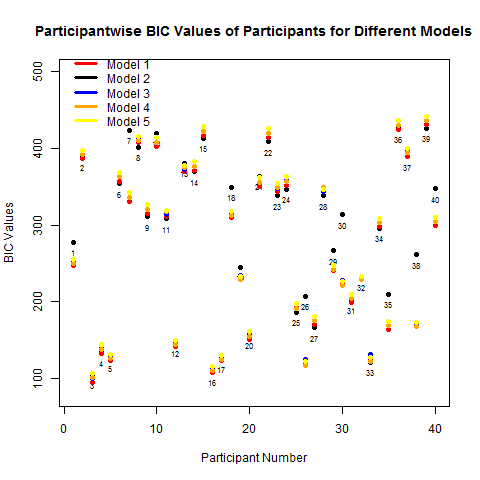

In [23]:
%%R
par_num = seq(1,40,1)
plot(BIC[,1], col = 'black', xlab = 'Participant Number', ylab='BIC Values', ylim= c(80,500),  pch=19, main='Participantwise BIC Values of Participants for Different Models')
text(BIC[,1], labels=par_num, cex= 0.7, pos=1)
points(BIC[,2], col='red',  pch=19)
points(BIC[,3], col = 'blue',  pch=19)
points(BIC[,4], col = 'orange',  pch=19)
points(BIC[,5], col = 'yellow',  pch=19)
legend(0,530, legend = c('Model 1','Model 2', 'Model 3', "Model 4", "Model 5"), 
       lty=c(1,1,1), lwd=c(3,3),col=c('red','black', 'blue', "orange", "yellow"), box.lty=0, bty ='n') 


<a id='likel'></a>

# Likelihood Of Models by Bayesion Model Selection

Higher the likelihood of the model ( p(model|data ), better the fit.

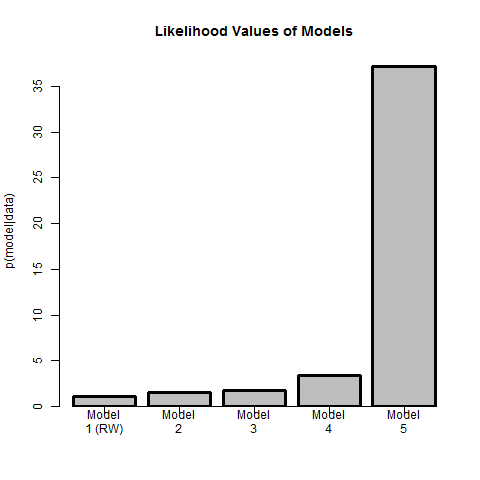

In [42]:
%%R
likelihood_values <- c(1.075,1.551,1.808,3.435,37.132) # likelihood values which were retrieved from MATLAB - spm.bms function

par(lwd = 3)
bar <- barplot(likelihood_values, col="gray",  
               border = c("black", "black", "black", "black", "black"), axes = T,
        ylab=' p(model|data)',cex.names=0.8, main='Likelihood Values of Models', ylim=c(0,38), xpd = FALSE)
axis(1, at=bar, lty =1, labels = c( "Model\n1 (RW)", "Model\n2","Model\n3", "Model\n4", "Model\n5"))


# [Back to Content](#content)

<a id='valconf'></a>

# Model to Predict Value-Based Confidence

In [27]:
%%R 
fit <- lmer(z_V_Conf ~ 0 + z_P_Conf + z_V_Rt  +
            (0 + z_P_Conf + z_V_Rt|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))

coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=2))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [28]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf', 'z_V_Rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf', 'z_V_Rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence', 'Value-Based Response Time']
conf_table_exp1

,Perceptual Confidence,Value-Based Response Time
coefficient,0.104088,-0.123044
se,0.029287,0.022895
t,3.554083,-5.374156
DF,42.768070,42.768070
CImax,0.133375,-0.100148
CImin,0.074801,-0.145939
p,0.000940,0.000000
SEmax,0.162662,-0.077253
SEmin,0.045514,-0.168835


# Coefficient Table for Predicting Value-Based Confidence

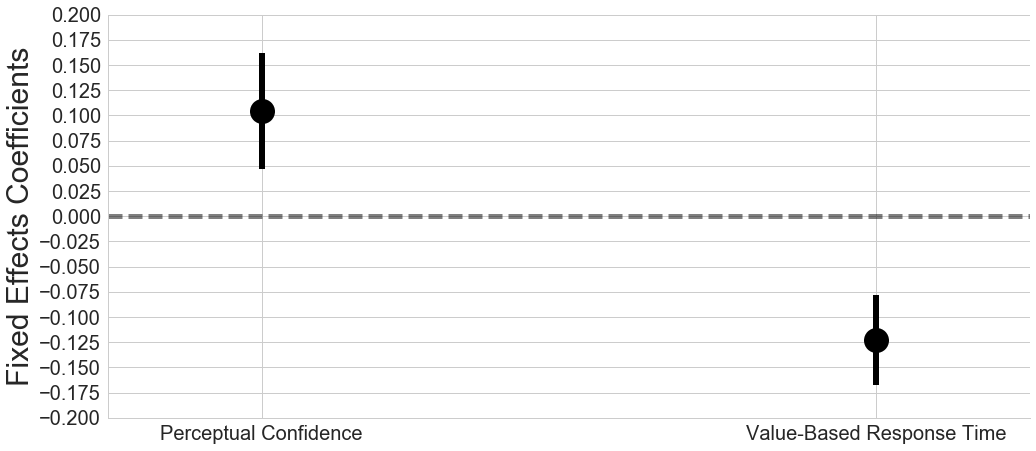

In [31]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.2, 0.2), ymultiple = (0.025))

# [Back to Content](#content)

<a id='perconf'></a>

# Model to Predict Perceptual Confidence by Value-Based Confidence in Previous Trial

In [32]:
%%R 

# combine perceptual confidence and response time in this trial with value confidence and response time in previous trial

j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_P_Conf[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    dat$z_P_Rt[dat$participant==j][i] <- dat$z_P_Rt[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_P_Conf[dat$participant==j][l] <- NA
        dat$z_P_Rt[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [33]:
%%R 
fit <- lmer(z_P_Conf ~ 0 + z_V_Conf + z_V_Rt + z_P_Rt +
            (0 + z_V_Conf + z_V_Rt + z_P_Rt|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))

coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=3))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [34]:
%%R
summary(fit)

In [35]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_V_Conf', 'z_V_Rt', 'z_P_Rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_V_Conf', 'z_V_Rt', 'z_P_Rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Value-Based Confidence\nIn Previous Trial', 'Value-Based Response Time\nIn Previous Trial', 'Perceptual Response Time']
conf_table_exp1

,Value-Based Confidence In Previous Trial,Value-Based Response Time In Previous Trial,Perceptual Response Time
coefficient,0.066299,0.038239,-0.215193
se,0.017145,0.015582,0.035666
t,3.866988,2.454045,-6.033572
DF,41.694845,41.694845,41.694845
CImax,0.083444,0.053822,-0.179527
CImin,0.049154,0.022657,-0.250859
p,0.000380,0.018390,0.000000
SEmax,0.100589,0.069404,-0.143861
SEmin,0.032009,0.007075,-0.286525


# Coefficient Table for Predicting Perceptual Confidence

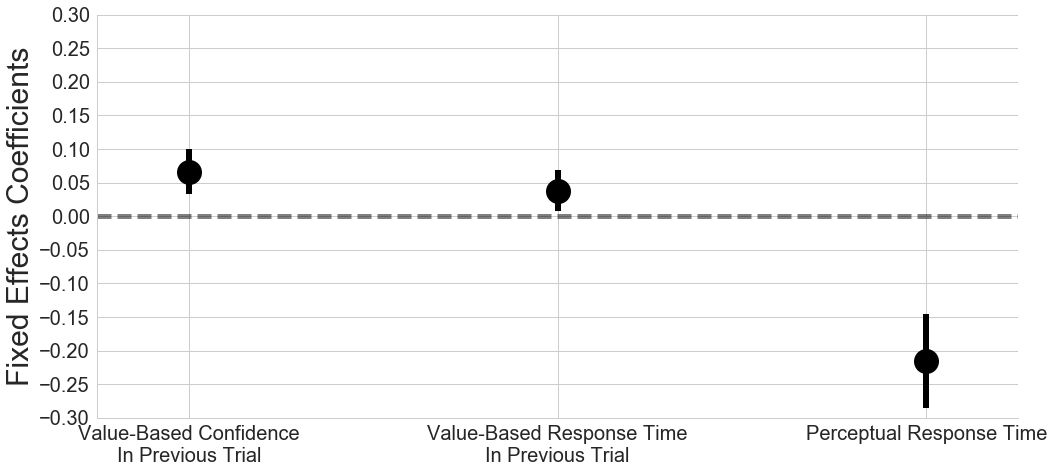

In [36]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.3, 0.3), ymultiple = (0.05))

In [37]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='ppconf'></a>

# Model to Predict Perceptual Confidence by Perceptual Confidence In Previous Trial

In [38]:
%%R 

# combine perceptual confidence and response time in next trial with perceptual confidence and response time in this trial

dat['z_P_Conf_Next'] <- 1
dat['z_P_Rt_Next'] <- 1

j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_P_Conf_Next[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    dat$z_P_Rt_Next[dat$participant==j][i] <- dat$z_P_Rt[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_P_Conf_Next[dat$participant==j][l] <- NA
        dat$z_P_Rt_Next[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [39]:
%%R 
fit <- lmer(z_P_Conf_Next ~ 0 + z_P_Conf  + z_V_Conf + z_P_Rt_Next +
            (0 + z_P_Conf + z_P_Rt_Next + z_V_Conf|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))
coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=3))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [40]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf', 'z_V_Conf', 'z_P_Rt_Next']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf', 'z_V_Conf', 'z_P_Rt_Next']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence\nin Previous Trial', 'Value Confidence\nin Previous Trial', 'Perceptual Response Time']
conf_table_exp1

,Perceptual Confidence in Previous Trial,Value Confidence in Previous Trial,Perceptual Response Time
coefficient,0.178154,0.043975,-0.203362
se,0.019727,0.014251,0.033401
t,9.030738,3.085810,-6.088410
DF,50.016273,50.016273,50.016273
CImax,0.197881,0.058226,-0.169960
CImin,0.158426,0.029724,-0.236763
p,0.000000,0.003300,0.000000
SEmax,0.217609,0.072476,-0.136559
SEmin,0.138699,0.015474,-0.270165


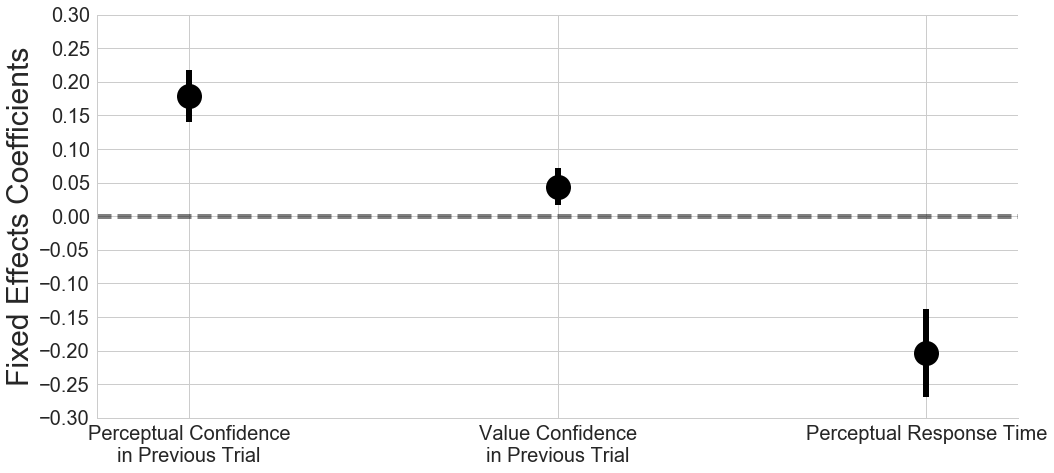

In [41]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.3, 0.3), ymultiple = (0.05))

In [43]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='vvconf'></a>

# Model to Predict Value-Based Confidence by Value-Based Confidence in Previous Trial

In [55]:
%%R 

# combine perceptual confidence and value confidence and response time in next with current trial

dat['z_P_Conf_Next'] <- 1
dat['z_V_Conf_Next'] <- 1
dat['z_V_Rt_Next'] <- 1

j <- 1
i <- 1
while(j<=40){
    l <- length(dat$z_P_Conf[dat$participant==j])
    i <- 1
while(i<l){
    dat$z_V_Conf_Next[dat$participant==j][i] <- dat$z_V_Conf[dat$participant==j][i+1]
    dat$z_V_Rt_Next[dat$participant==j][i] <- dat$z_V_Rt[dat$participant==j][i+1]
    dat$z_P_Conf_Next[dat$participant==j][i] <- dat$z_P_Conf[dat$participant==j][i+1]
    i <- i +1
}
    if(i==l){
        dat$z_V_Conf_Next[dat$participant==j][l] <- NA
        dat$z_V_Rt_Next[dat$participant==j][l] <- NA
        dat$z_P_Conf_Next[dat$participant==j][l] <- NA
    }
    j <- j + 1
}

dat <- dat[rowSums(is.na(dat)) == 0,]

In [56]:
%%R 
fit <- lmer(z_V_Conf_Next ~ 0 + z_P_Conf_Next  + z_V_Conf + z_V_Rt_Next  + z_P_Conf + 
            (0 + z_P_Conf_Next  +  z_V_Rt_Next  + z_V_Conf|participant), data=dat, 
            control=lmerControl(optimizer="optimx",
                                           optCtrl=list(method='nlminb')))
coefs <- data.frame(coef(summary(fit)))

df.KR <- get_ddf_Lb(fit, fixef(fit))

coefs$df.KR <-(rep(df.KR, each=4))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [57]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'z_P_Conf_Next', 'z_V_Conf', 'z_V_Rt_Next', 'z_P_Conf']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'z_P_Conf_Next', 'z_V_Conf', 'z_V_Rt_Next', 'z_P_Conf']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence', 'Value-Based Confidence\n in Previous Trial', 'Value-Based Response Time', 'Perceptual Confidence in\n Previous Trial']
conf_table_exp1

,Perceptual Confidence,Value-Based Confidence in Previous Trial,Value-Based Response Time,Perceptual Confidence in Previous Trial
coefficient,0.074964,0.366158,-0.096154,0.024758
se,0.026498,0.035652,0.017728,0.008346
t,2.829017,10.270287,-5.423898,2.966631
DF,41.057991,41.057991,41.057991,41.057991
CImax,0.101462,0.401810,-0.078427,0.033104
CImin,0.048466,0.330505,-0.113882,0.016413
p,0.007190,0.000000,0.000000,0.005000
SEmax,0.127960,0.437462,-0.060699,0.041450
SEmin,0.021967,0.294853,-0.131610,0.008067


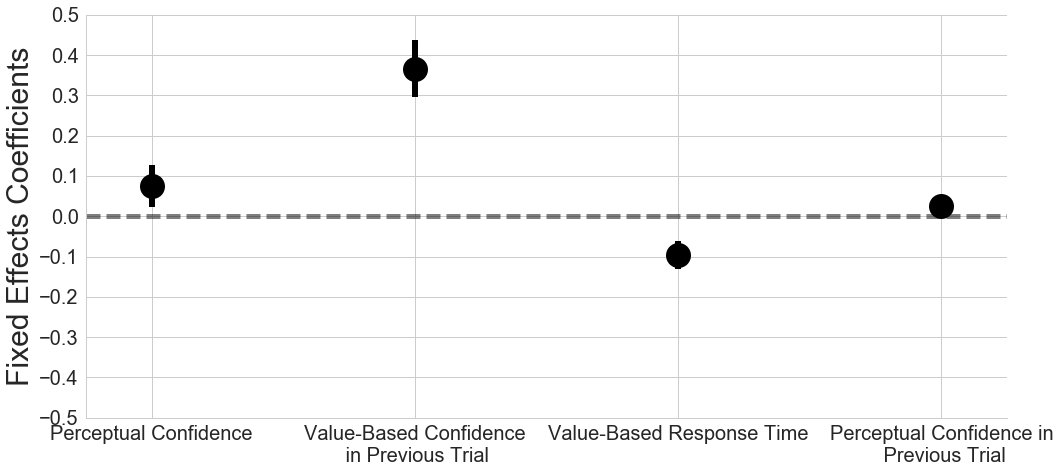

In [58]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='big', ylimits=(-0.5, 0.5), ymultiple = (0.1))

In [54]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='rightd'></a>

# Model to Predict Choice of The Correct Deck



Predicting Correct Deck (One which has higher payoff probability)

In [21]:
%%R 
dat['correct_deck'] <- 5
dat$correct_deck[which((dat$chosen_deck == 1 & dat$deck_prob1 >= dat$deck_prob2) |
                         (dat$chosen_deck == 0 & dat$deck_prob2 > dat$deck_prob1))] <- 1
dat$correct_deck[which(dat$correct_deck != 1)] <- 0

fit_log_v <- glmer(correct_deck ~ 1 + z_V_Conf + z_V_Rt + z_V_Conf:z_V_Rt +
                   (1 +z_V_Conf + z_V_Conf:z_V_Rt + z_V_Rt|participant),
                data=dat, family = binomial(link="logit"))


In [22]:
%%R 
fix_1a <- fixef(fit_log_v)
fix_se_1a <- sqrt(diag(vcov(fit_log_v)))
names_1a <- names(fix_1a)

In [32]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'z_V_Conf', 'z_V_Rt', 'z_V_Conf:z_V_Rt']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['(Intercept)', 'Value\nConfidence','Value Response\nTime',
                             'Value Confidence\n x Value Response Time']
choice_table_exp1

,(Intercept),Value Confidence,Value Response Time,Value Confidence x Value Response Time
coefficient,0.724031,0.382212,-0.120727,-0.077576
se,0.083414,0.049642,0.031999,0.026743
CImin,0.560540,0.284914,-0.183445,-0.129992
CImax,0.887521,0.479510,-0.058008,-0.025160


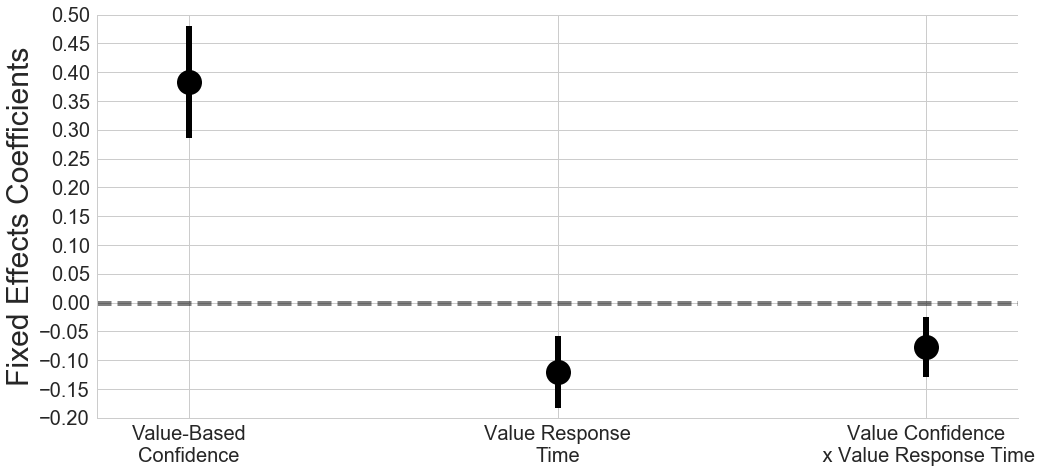

In [31]:
Coefpresplot(choice_table_exp1, title='', ticklabsize=16, size='big',
             ylimits=(-0.2, 0.5), ymultiple=0.05)

In [25]:
%R dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));

# [Back to Content](#content)

<a id='a'></a>

# Correlations Between DDM parameter estimates in Perceptual Task and Value-Based Task:


Drift Rate, corr = 0.23 , p = 0.149 - although not significant- which may be interpreted as people who accumulates evidence fast in one task is also fast at the other.


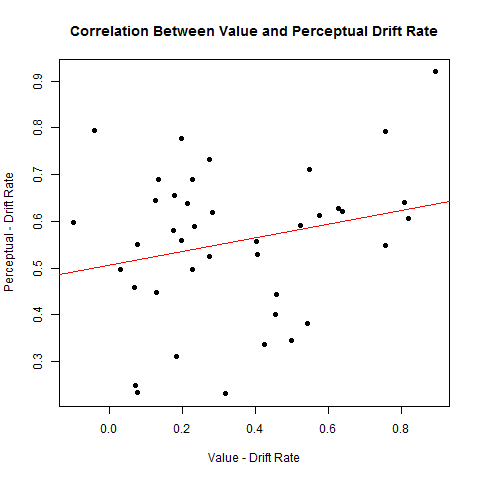

In [30]:
%%R 
fit_v <- lm(ddm[45:84,2] ~ ddm_v[45:84,2])
plot(ddm_v[45:84,2], ddm[45:84,2], main='Correlation Between Value and Perceptual Drift Rate',
     xlab='Value - Drift Rate', ylab='Perceptual - Drift Rate', pch=19)
abline(fit_v, col='red')

Threshold, corr =  0.7559787, p = 10^-8 can be interpreted in the same way the previous correlation was done.

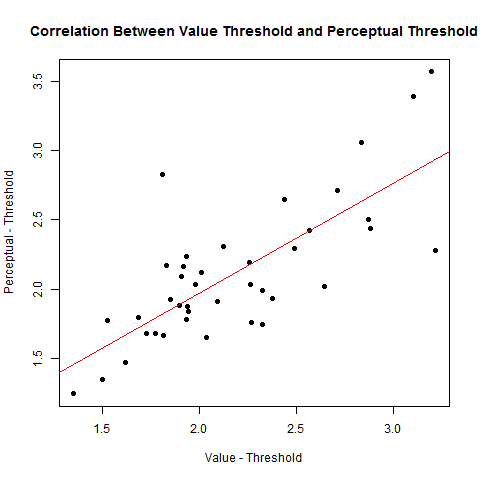

In [37]:
%%R 
fit_t <- lm(ddm[3:42,2] ~ ddm_v[3:42,2])
plot(ddm_v[3:42,2], ddm[3:42,2], main='Correlation Between Value Threshold and Perceptual Threshold',
     xlab='Value - Threshold', ylab='Perceptual - Threshold', pch=19)
abline(fit_t, col='red')

Bias, corr = 0.40, p = 0.01

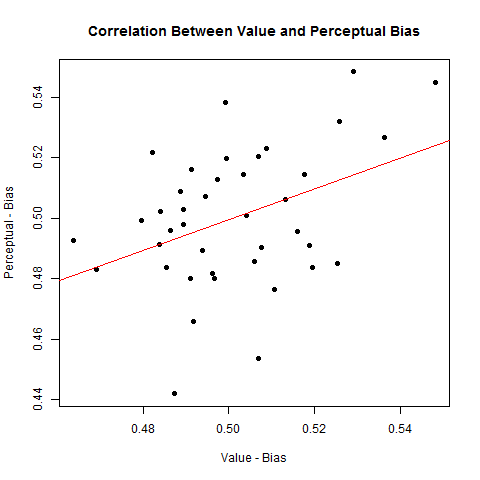

In [32]:
%%R 
fit_b <- lm(ddm[129:168,2] ~ ddm_v[129:168,2])
plot(ddm_v[129:168,2], ddm[129:168,2], main='Correlation Between Value and Perceptual Bias',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_b, col='red')

Non-Decision Time Parameter (t), corr = 0.61, p= 2.9x10^-5

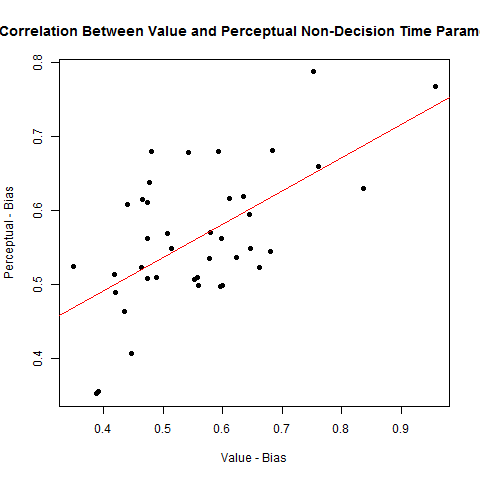

In [33]:
%%R 
fit_t <- lm(ddm[87:126,2] ~ ddm_v[87:126,2])
plot(ddm_v[87:126,2], ddm[87:126,2], main='Correlation Between Value and Perceptual Non-Decision Time Parameter',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_t, col='red')

# [Back to Content](#content)

<a id='hddm_f'></a>
# HHDM Estimates with Bias as a Fixed Parameter

# Correlations Between DDM parameter estimates in Perceptual Task and Value-Based Task:

Threshold, as in the estimates with bias as a free parameter is positive and significant. corr= 0.75 , p= 10 ^ -8 

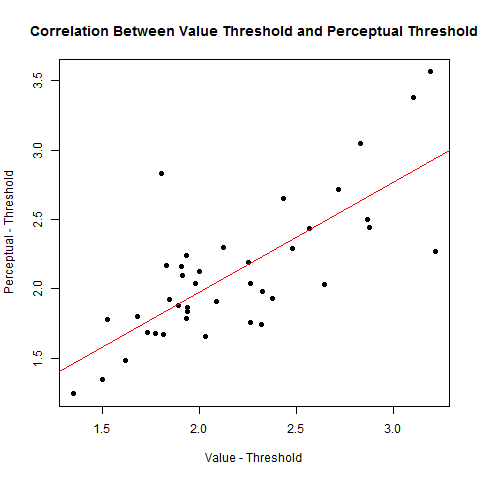

In [38]:
%%R 
fit_twb <- lm(ddm_p_wb[3:42,2] ~ ddm_v_wb[3:42,2])
plot(ddm_v_wb[3:42,2], ddm_p_wb[3:42,2], main='Correlation Between Value Threshold and Perceptual Threshold',
     xlab='Value - Threshold', ylab='Perceptual - Threshold', pch=19)
abline(fit_twb, col='red')

Drift rate, however, isn't significant but shows a positive trend. corr = 0.18, p = 0.26

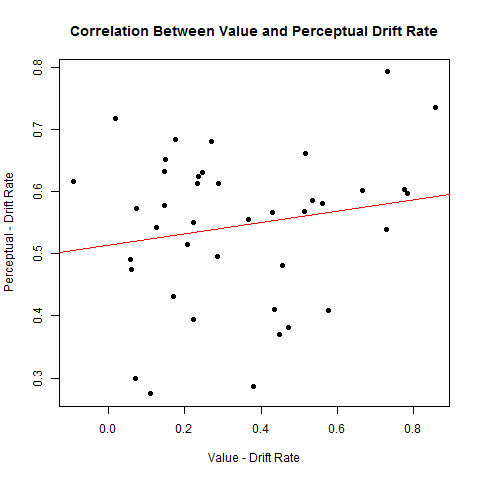

In [26]:
%%R 
fit_vwb <- lm(ddm_p_wb[45:84,2] ~ ddm_v_wb[45:84,2])
plot(ddm_v_wb[45:84,2], ddm_p_wb[45:84,2], main='Correlation Between Value and Perceptual Drift Rate',
     xlab='Value - Drift Rate', ylab='Perceptual - Drift Rate', pch=19)
abline(fit_vwb, col='red')

Non-Decision Time Parameter (t), corr = 0.61, p= 2.9x10^-5

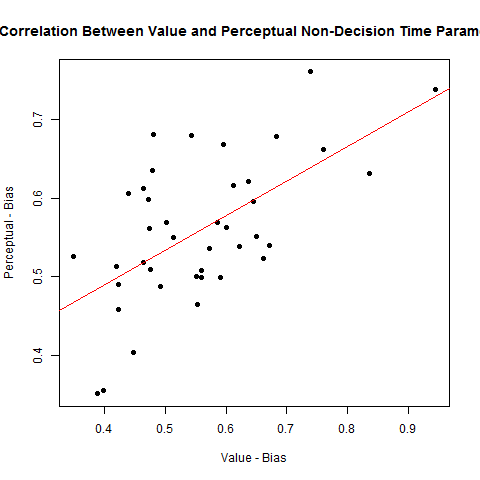

In [36]:
%%R 
fit_twb <- lm(ddm_p_wb[87:126,2] ~ ddm_v_wb[87:126,2])
plot(ddm_v_wb[87:126,2], ddm_p_wb[87:126,2], main='Correlation Between Value and Perceptual Non-Decision Time Parameter',
     xlab='Value - Bias', ylab='Perceptual - Bias', pch=19)
abline(fit_twb, col='red')

# [Back to Content](#content)

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab
import glob
import scipy.io as sio

# Show graphs in Notebook
%matplotlib inline

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(15, 15);

# Set up interface with R
import rpy2
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ecem\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
%%R
library("devtools")
library("lme4")
library("plotly")
library("LaplacesDemon")
library("ggplot2")
library("lmerTest")
library("optimx")
library("gdata")
library("Formula")
library("miscTools")
library("maxLik")
library("mlogit")
library("pbkrtest")
library("foreign")
library("MASS")
library("car")
library("tools")
library("nlme")
library('interplot')
library("lattice")
library("R.matlab")

In [3]:
%%R 
dat <- as.data.frame(read.csv('exp_final.csv', sep = ",", header = TRUE));  # load main experimental data

ddm <- as.data.frame(read.csv('ddm.csv', sep = ",", header = TRUE)) # load ddm fitting in perceptual task
#with bias as a free parameter
ddm_v <- as.data.frame(read.csv('ddm_v.csv', sep = ",", header = TRUE)) # load ddm fitting in value_based task
#with bias as a free parameter
ddm_p_wb <- as.data.frame(read.csv('ddm_p_wb.csv', sep = ",", header = TRUE)) # load ddm fitting in perceptual task
#without bias as a free parameter
ddm_v_wb <- as.data.frame(read.csv('ddm_v_wb.csv', sep = ",", header = TRUE)) # load ddm fitting in value_based task
#without bias as a free parameter

In [4]:
%R -o dat

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [12]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='whitegrid')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=40)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=5)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=25, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=6, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=0)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=30)
    
    # Autoformats the ticklabels for the xaxis
   
    
    sns.despine()